In [97]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Do clustering with the iris flower dataset to form clusters using as features the four features

In [98]:
df = pd.read_csv(r"C:\Users\alana\Documents\TC1002S\NotebooksProfessor\datasets\Iris.csv", header=None)
df.rename(columns={4:"Type of flower"}, inplace=True)
df.rename(columns={0:"sepalLength"}, inplace=True)
df.rename(columns={1:"sepalWidth"}, inplace=True)
df.rename(columns={2:"petalLength"}, inplace=True)
df.rename(columns={3:"petalWidth"}, inplace=True)
df.iloc[:, -1] = df.iloc[:, -1].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})

print(df)

     sepalLength  sepalWidth  petalLength  petalWidth  Type of flower
0            5.1         3.5          1.4         0.2               1
1            4.9         3.0          1.4         0.2               1
2            4.7         3.2          1.3         0.2               1
3            4.6         3.1          1.5         0.2               1
4            5.0         3.6          1.4         0.2               1
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3               3
146          6.3         2.5          5.0         1.9               3
147          6.5         3.0          5.2         2.0               3
148          6.2         3.4          5.4         2.3               3
149          5.9         3.0          5.1         1.8               3

[150 rows x 5 columns]


C:\Users\alana\AppData\Local\Temp\ipykernel_30156\3288036845.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, -1] = df.iloc[:, -1].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})


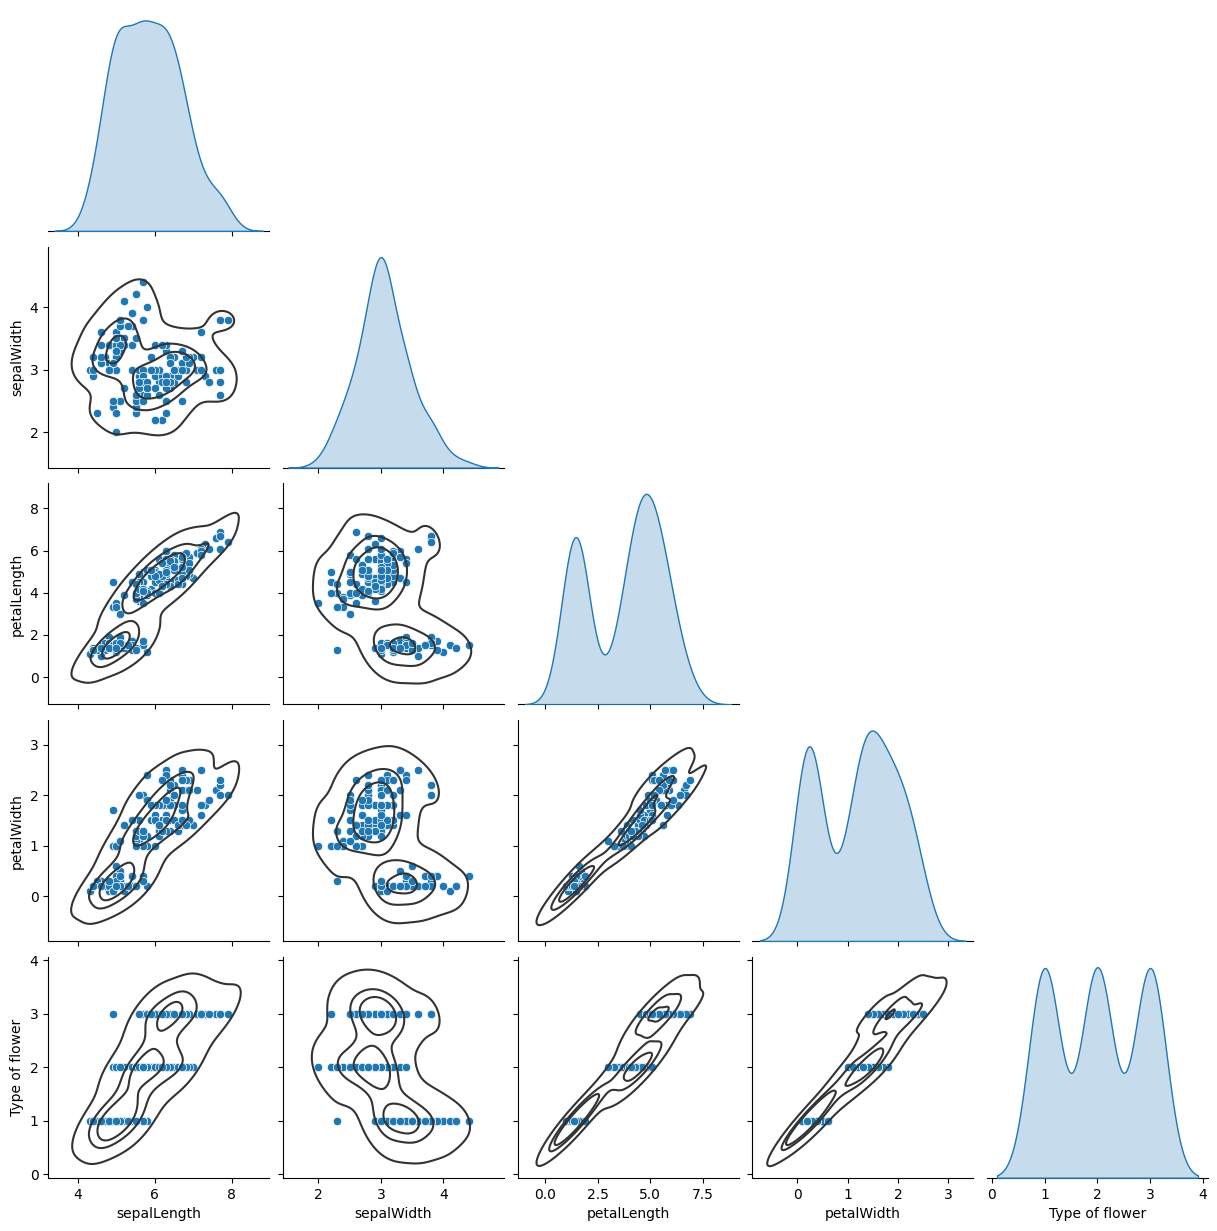

In [99]:
#Pairplot, scatterplot all variables
g = sns.pairplot(df, corner=True, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color='.2')
plt.show()

In [100]:
from sklearn.cluster import KMeans
k = 3

#Initialize the Kmeans box/object
km = KMeans(n_clusters=k,n_init="auto")

#Do K-means clustering
yestimated = km.fit_predict(df)
df['yestimated'] = yestimated
df

,sepalLength,sepalWidth,petalLength,petalWidth,Type of flower,yestimated
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,1
146,6.3,2.5,5.0,1.9,3,1
147,6.5,3.0,5.2,2.0,3,1
148,6.2,3.4,5.4,2.3,3,1


In [101]:
#Print the labels/names of the existing clusters
df.yestimated.unique()

array([0, 2, 1])

In [102]:
#Cluster controllers
km.cluster_centers_

array([[5.006, 3.418, 1.464, 0.244, 1.   ],
       [6.624, 2.984, 5.562, 2.026, 2.98 ],
       [5.9  , 2.76 , 4.25 , 1.326, 2.02 ]])

Plot estimated clusters

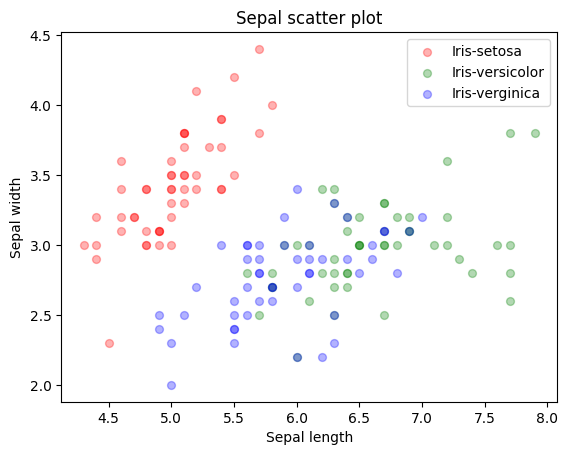

In [103]:
#Get a dataframe with the data of each cluster
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

#Scatter plot of each cluster
types = ['Iris-setosa', 'Iris-versicolor', 'Iris-verginica']
plt.scatter(df1.sepalLength, df1.sepalWidth, label=types[0], c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.sepalLength, df2.sepalWidth, label=types[1], c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.sepalLength, df3.sepalWidth, label=types[2], c='b', marker='o', s=32, alpha=0.3)

plt.title('Sepal scatter plot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

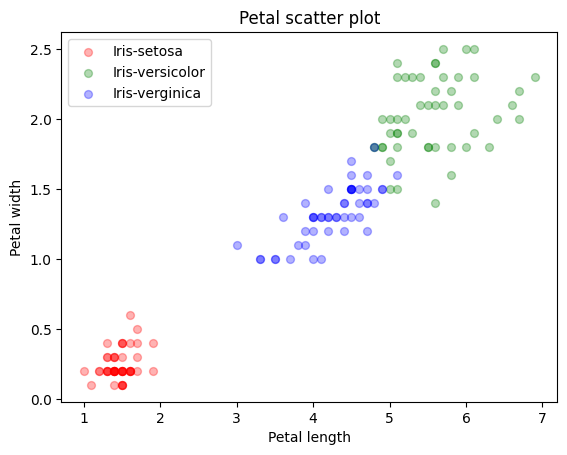

In [104]:
#Get a dataframe with the data of each cluster
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]

#Scatter plot of each cluster
types = ['Iris-setosa', 'Iris-versicolor', 'Iris-verginica']
plt.scatter(df1.petalLength, df1.petalWidth, label=types[0], c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.petalLength, df2.petalWidth, label=types[1], c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.petalLength, df3.petalWidth, label=types[2], c='b', marker='o', s=32, alpha=0.3)

plt.title('Petal scatter plot')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()